# StyleCheck Experiment Data Analysis

## Setup

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

print(plt.style.available)

['dark_background', 'ggplot', 'bmh', 'fivethirtyeight', 'grayscale']


In [4]:
# Make the tables look prettier

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
# Imports
initial = pd.read_csv('initial.csv', sep=";", decimal=",")#, index_col="id")

# Create categorial data and order it
participants = [421, 423, 424, 425, 427, 428, 429, 430, 432]
scale_cat = [1, 2, 3, 4, 5]
scale_important = {1: "Very important", 2: "Important", 3: "Neutral", 4: "Not important", 5: "Not at all important"}

def setup_str_categorial(column, categories):
    return column.str.upper().astype("category", categories=categories, ordered=True)
def setup_categorial(column, categories):
    return column.astype("category", categories=categories, ordered=True)

scale = lambda x: setup_categorial(x, scale_cat)

initial.id = initial.id.astype("category", categories=participants, ordered=True)

for col in ["15a", "15b", "15c", "15d-", "15e"]:
    initial[col] = scale(initial[col])

In [6]:
initial.columns

Index(['time', 'id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15a', '15b', '15c', '15d-', '15e', '18', '19', '20',
       '21a', '21b', '21c', '21d-', '21e', '21f', '22', '23', '16', '15f',
       '17'],
      dtype='object')

In [7]:
def sns_style(h=6, w=12):
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.6)
    plt.figure(figsize=(w, h))

### For how many years have they studied?

In [26]:
def pie(column):
    initial[column].value_counts().plot(kind="pie", figsize=(6, 6), autopct='%.2f', fontsize=20)

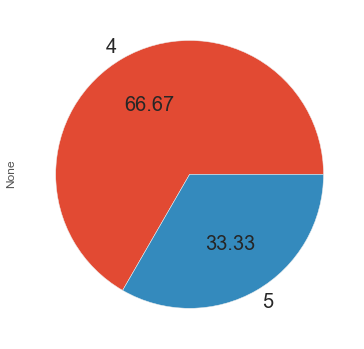

In [27]:
pie("8")

### For how many years have they worked as translators?

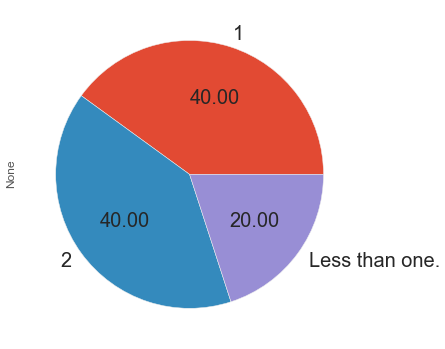

In [28]:
pie("10")

In [51]:
initial[["11", "9"]]

,11,9
0,"Translating from scratch, Localizing",No
1,"Translating from scratch, Proof-reading, Machi...",Yes
2,"Translating from scratch, Machine translation ...",No
3,"Translating from scratch, Proof-reading, Machi...",Yes
4,"Translating from scratch, Proof-reading, Local...",Yes
5,"Machine translation post-editing, Transcreatio...",Yes
6,Localizing,No
7,"Proof-reading, Preparing documents for interna...",Yes
8,Preparing documents for internationalisation,No


### What is important when translating? Ratings for considerations when translating

In [9]:
initial_2 = pd.read_csv('initial.csv', sep=";", decimal=",")#, index_col="id")

In [102]:
for col in ["15a", "15b", "15c", "15d-", "15e", "15f"]:
    print(" --->  ".join([col, str(initial_2[col].mean())]))

15a --->  2.11111111111
15b --->  2.22222222222
15c --->  2.0
15d- --->  1.22222222222
15e --->  1.44444444444
15f --->  1.55555555556


In [101]:
for col in ["15a", "15b", "15c", "15d-", "15e", "15f"]:
    print(" --->  ".join([col, str(initial_2[col].std())]))

15a --->  0.781735959971
15b --->  1.20185042515
15c --->  1.11803398875
15d- --->  0.440958551844
15e --->  0.527046276695
15f --->  0.726483157257


(0.5, 5.5)

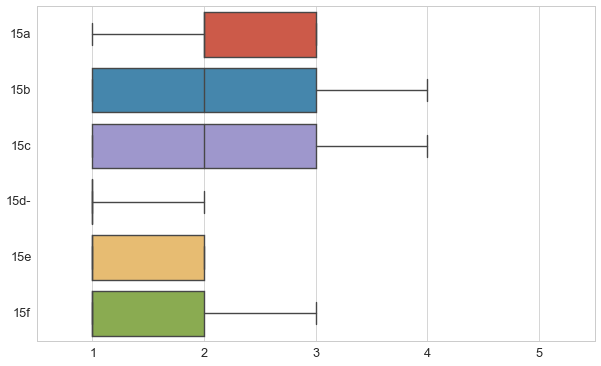

In [12]:
sns_style(w=10)
t = sns.boxplot(data=initial_2[["15a", "15b", "15c", "15d-", "15e", "15f"]], orient="h")
t.set_xlim(0.5,5.5)